In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
mental_health = pd.read_csv("E:\Data Science Works\Projects\EDA\EDA-on-mental-health-of-pregnant-women-during-COVID\Pregnancy During the COVID-19 Pandemic.csv")

In [3]:
mental_health.shape

(10772, 16)

In [4]:
mental_health.columns

Index(['OSF_ID', 'Maternal_Age', 'Household_Income', 'Maternal_Education',
       'Edinburgh_Postnatal_Depression_Scale', 'PROMIS_Anxiety',
       'Gestational_Age_At_Birth',
       'Delivery_Date(converted to month and year)', 'Birth_Length',
       'Birth_Weight', 'Delivery_Mode', 'NICU_Stay', 'Language',
       'Threaten_Life', 'Threaten_Baby_Danger', 'Threaten_Baby_Harm'],
      dtype='object')

In [5]:
mental_health.drop(columns=['OSF_ID','Language'], inplace=True)

In [6]:
mental_health.head()

Maternal_Age    Household_Income    Maternal_Education  \
0          38.3           $200,000+        Masters degree   
1          34.6           $200,000+  Undergraduate degree   
2          34.3  $100,000 -$124,999  Undergraduate degree   
3          28.8  $100,000 -$124,999        Masters degree   
4          36.5     $40,000-$69,999  Undergraduate degree   

   Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
0                                   9.0            13.0   
1                                   4.0            17.0   
2                                   NaN             NaN   
3                                   9.0            20.0   
4                                  14.0            20.0   

   Gestational_Age_At_Birth Delivery_Date(converted to month and year)  \
0                     39.71                                    Dec2020   
1                       NaN                                        NaN   
2                       NaN                                        NaN   
3                     38.57                                    Dec2020   
4                     39.86                                    Oct2020   

   Birth_Length  Birth_Weight                  Delivery_Mode NICU_Stay  \
0         49.20        3431.0                      Vaginally        No   
1           NaN           NaN                            NaN       NaN   
2           NaN           NaN                            NaN       NaN   
3         41.00        2534.0                      Vaginally        No   
4         53.34        3714.0  Caesarean-section (c-section)        No   

  Threaten_Life Threaten_Baby_Danger Threaten_Baby_Harm  
0             2                    3                 27  
1             2                   33                 92  
2                                                        
3            53                   67                 54  
4            23                   32                 71

In [7]:
# rows to drop 
rows_to_drop = mental_health[(mental_health['PROMIS_Anxiety'].isnull())&(mental_health['Gestational_Age_At_Birth'].isnull())&(mental_health['Delivery_Date(converted to month and year)'].isnull())&(mental_health['Threaten_Life']==" ")&(mental_health['Threaten_Baby_Danger']==" ")&(mental_health["Threaten_Baby_Harm"]==" ")].index

In [8]:
mental_health.drop(rows_to_drop,inplace = True)

In [9]:
mental_health.head()
mental_health.shape

(10292, 14)

In [10]:
mental_health.duplicated().sum()

0

In [11]:
mental_health.isnull().sum(axis=0)/mental_health.shape[0]*100

Maternal_Age                                   0.864749
Household_Income                               2.176448
Maternal_Education                             1.486592
Edinburgh_Postnatal_Depression_Scale           6.743101
PROMIS_Anxiety                                 7.054023
Gestational_Age_At_Birth                      34.570540
Delivery_Date(converted to month and year)    34.580257
Birth_Length                                  46.754761
Birth_Weight                                  40.944423
Delivery_Mode                                 46.200933
NICU_Stay                                     46.230082
Threaten_Life                                  0.000000
Threaten_Baby_Danger                           0.000000
Threaten_Baby_Harm                             0.000000
dtype: float64

In [12]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10292 entries, 0 to 10771
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Maternal_Age                                10203 non-null  float64
 1   Household_Income                            10068 non-null  object 
 2   Maternal_Education                          10139 non-null  object 
 3   Edinburgh_Postnatal_Depression_Scale        9598 non-null   float64
 4   PROMIS_Anxiety                              9566 non-null   float64
 5   Gestational_Age_At_Birth                    6734 non-null   float64
 6   Delivery_Date(converted to month and year)  6733 non-null   object 
 7   Birth_Length                                5480 non-null   float64
 8   Birth_Weight                                6078 non-null   float64
 9   Delivery_Mode                               5537 non-null   object 
 10  NICU_Stay      

In [13]:
numerical_df = mental_health.select_dtypes(include = ['number'])

In [14]:
fig, axs = plt.subplots(2,3,figsize=(15,10))
axs = axs.flatten()
for i , col in enumerate(numerical_df.columns):
    if i<6:
        sns.kdeplot(numerical_df[col],ax = axs[i])
        axs[i].set_title(col)
        
    
plt.tight_layout()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

In [15]:
mental_health.dtypes

Maternal_Age                                  float64
Household_Income                               object
Maternal_Education                             object
Edinburgh_Postnatal_Depression_Scale          float64
PROMIS_Anxiety                                float64
Gestational_Age_At_Birth                      float64
Delivery_Date(converted to month and year)     object
Birth_Length                                  float64
Birth_Weight                                  float64
Delivery_Mode                                  object
NICU_Stay                                      object
Threaten_Life                                  object
Threaten_Baby_Danger                           object
Threaten_Baby_Harm                             object
dtype: object

In [16]:
print(mental_health['Household_Income'].value_counts())
print(" ")
print(" ")

print(mental_health['Maternal_Education'].value_counts())
print(" ")
print(" ")
print(mental_health['Delivery_Mode'].value_counts())
print(" ")
print(" ")
print(mental_health['NICU_Stay'].value_counts())
print(" ")
print(" ")

Household_Income
$70,000-$99,999        2006
$100,000 -$124,999     1886
$40,000-$69,999        1348
$125,000- $149,999     1315
$150,000 - $174,999    1115
$200,000+               977
$175,000- $199,999      641
$20,000- $39,999        561
Less than $20, 000      219
Name: count, dtype: int64
 
 
Maternal_Education
Undergraduate degree             3979
College/trade school             2588
Masters degree                   1849
High school diploma               835
Doctoral Degree                   767
Less than high school diploma     121
Name: count, dtype: int64
 
 
Delivery_Mode
Vaginally                        3904
Caesarean-section (c-section)    1633
Name: count, dtype: int64
 
 
NICU_Stay
No     4986
Yes     548
Name: count, dtype: int64
 
 


In [17]:
mental_health['Threaten_Life'].value_counts()
# there are blank values thaet is why it is showing object dtype althoght these col are numerical in nature but they dtpt is given obj

Threaten_Life
50    819
0     493
      416
49    279
48    274
     ... 
84     20
86     19
89     18
88     14
87     12
Name: count, Length: 102, dtype: int64

In [18]:
# fill these value in such a way so that do not affect the distribution
mental_health['Threaten_Life'].replace(' ', -1).astype('int')

0         2
1         2
3        53
4        23
5        29
         ..
10766    54
10767    54
10769    21
10770    65
10771    84
Name: Threaten_Life, Length: 10292, dtype: int32

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


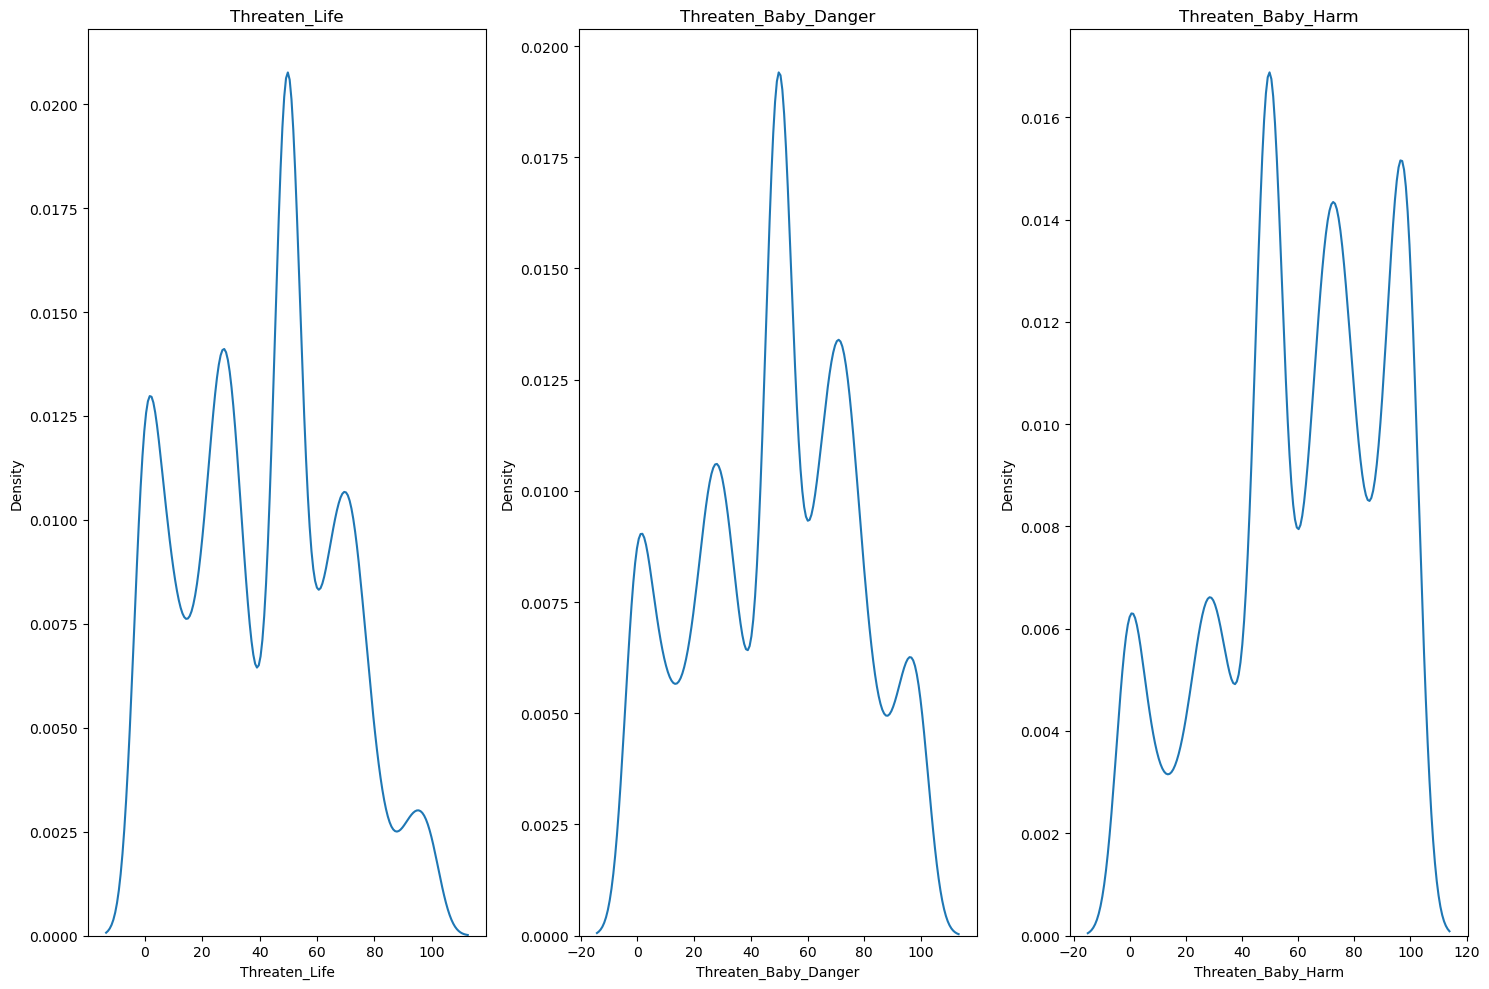

In [19]:
fig, axs = plt.subplots(1,3,figsize=(15,10))
axs = axs.flatten()

sns.kdeplot(data = mental_health['Threaten_Life'].replace(' ', -1).astype('int'),ax = axs[0])
axs[0].set_title('Threaten_Life')

sns.kdeplot(data = mental_health['Threaten_Baby_Danger'].replace(' ', -1).astype('int'),ax = axs[1])
axs[1].set_title('Threaten_Baby_Danger')

sns.kdeplot(data = mental_health['Threaten_Baby_Harm'].replace(' ', -1).astype('int'),ax = axs[2])
axs[2].set_title('Threaten_Baby_Harm')
    
plt.tight_layout()
plt.show()

In [20]:
# Now ready for the analysis 
# bivariate analysis

mental_health['Gestational_Age_At_Birth'] = np.round(mental_health['Gestational_Age_At_Birth']/4.33)
mental_health.head()

Maternal_Age     Household_Income    Maternal_Education  \
0          38.3            $200,000+        Masters degree   
1          34.6            $200,000+  Undergraduate degree   
3          28.8   $100,000 -$124,999        Masters degree   
4          36.5      $40,000-$69,999  Undergraduate degree   
5          38.3  $150,000 - $174,999  Undergraduate degree   

   Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
0                                   9.0            13.0   
1                                   4.0            17.0   
3                                   9.0            20.0   
4                                  14.0            20.0   
5                                   3.0             8.0   

   Gestational_Age_At_Birth Delivery_Date(converted to month and year)  \
0                       9.0                                    Dec2020   
1                       NaN                                        NaN   
3                       9.0                                    Dec2020   
4                       9.0                                    Oct2020   
5                       9.0                                    Jun2020   

   Birth_Length  Birth_Weight                  Delivery_Mode NICU_Stay  \
0         49.20        3431.0                      Vaginally        No   
1           NaN           NaN                            NaN       NaN   
3         41.00        2534.0                      Vaginally        No   
4         53.34        3714.0  Caesarean-section (c-section)        No   
5           NaN           NaN                            NaN       NaN   

  Threaten_Life Threaten_Baby_Danger Threaten_Baby_Harm  
0             2                    3                 27  
1             2                   33                 92  
3            53                   67                 54  
4            23                   32                 71  
5            29                   36                 33

In [21]:
#create column for healthy weight
def healthy_weight(row):
    if pd.isnull(row['Birth weight']):
        return 'missing data'
    elif row['Birth weight']>2550 and row['Birth weight']<4000:
        return 'healthy'
    else:
        return 'unhealthy'
    
def healthy_height(row):
    if pd.isnull(row['Birth height']):
        return 'missing data'
    elif row['Birth height']>39 and row['Birth height']<61:
        return 'healthy'
    else:
        return 'unhealthy'

In [22]:
#lets create   column  for healthy birth weight
def healthy_weight(row):
  if pd.isnull(row['Birth_Weight']):
    return 'Data Missing'
  elif row['Birth_Weight']>2550 and row['Birth_Weight']<4000:
    return 'Healthy'
  else:
    return 'Unhealthy'



#lets create   column  for healthy birth height
def healthy_height(row):
  if pd.isnull(row['Birth_Length']):
    return 'Data Missing'
  elif row['Birth_Length']>39 and row['Birth_Length']<61:
    return 'Healthy'
  else:
    return 'Unhealthy'

In [23]:
mental_health['Weight']= mental_health.apply(healthy_weight, axis=1)
mental_health['Height']= mental_health.apply(healthy_height, axis=1)
mental_health.head()

Maternal_Age     Household_Income    Maternal_Education  \
0          38.3            $200,000+        Masters degree   
1          34.6            $200,000+  Undergraduate degree   
3          28.8   $100,000 -$124,999        Masters degree   
4          36.5      $40,000-$69,999  Undergraduate degree   
5          38.3  $150,000 - $174,999  Undergraduate degree   

   Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
0                                   9.0            13.0   
1                                   4.0            17.0   
3                                   9.0            20.0   
4                                  14.0            20.0   
5                                   3.0             8.0   

   Gestational_Age_At_Birth Delivery_Date(converted to month and year)  \
0                       9.0                                    Dec2020   
1                       NaN                                        NaN   
3                       9.0                                    Dec2020   
4                       9.0                                    Oct2020   
5                       9.0                                    Jun2020   

   Birth_Length  Birth_Weight                  Delivery_Mode NICU_Stay  \
0         49.20        3431.0                      Vaginally        No   
1           NaN           NaN                            NaN       NaN   
3         41.00        2534.0                      Vaginally        No   
4         53.34        3714.0  Caesarean-section (c-section)        No   
5           NaN           NaN                            NaN       NaN   

  Threaten_Life Threaten_Baby_Danger Threaten_Baby_Harm        Weight  \
0             2                    3                 27       Healthy   
1             2                   33                 92  Data Missing   
3            53                   67                 54     Unhealthy   
4            23                   32                 71       Healthy   
5            29                   36                 33  Data Missing   

         Height  
0       Healthy  
1  Data Missing  
3       Healthy  
4       Healthy  
5  Data Missing

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

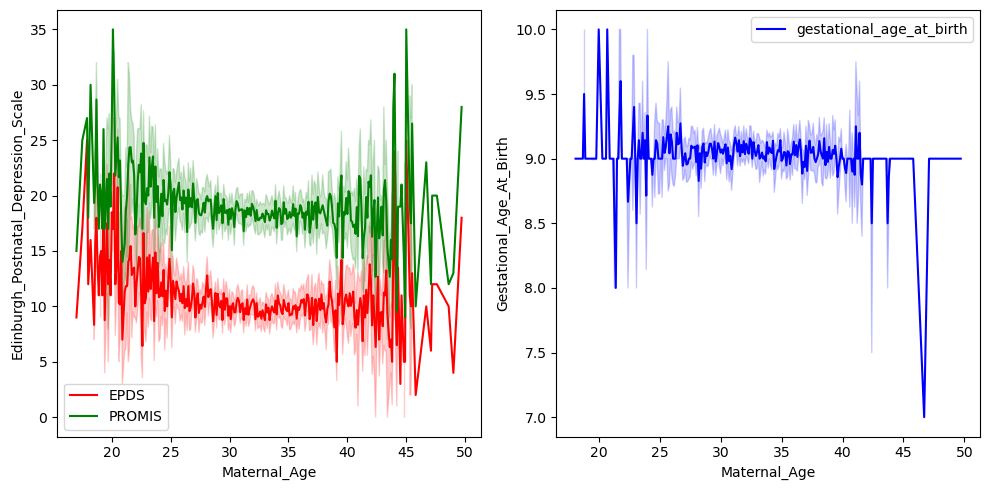

In [24]:
#Analysis
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs = axs.flatten()

sns.lineplot(x = 'Maternal_Age',y = 'Edinburgh_Postnatal_Depression_Scale',data = mental_health,ax = axs[0],color = 'red', label = 'EPDS')
sns.lineplot(x = 'Maternal_Age',y = 'PROMIS_Anxiety',data = mental_health,ax = axs[0],color = 'green', label = 'PROMIS')

sns.lineplot(x = 'Maternal_Age',y = 'Gestational_Age_At_Birth',data = mental_health,ax = axs[1],color = 'blue', label = 'gestational_age_at_birth')

plt.tight_layout()
plt.show()

In [27]:
new_df = mental_health[mental_health['Delivery_Mode'].notnull()]

In [29]:
new_df = new_df[['Delivery_Mode','Maternal_Age']]

def age_category(row):
    if(row['Maternal_Age']<23):
        return 'under_age'
    if (row['Maternal_Age']>=23 and row['Maternal_Age']<38):
        return 'healthy_age'
    else:
        return 'old_age'
        

In [34]:
new_df.loc[:, 'Age_Category'] = new_df.apply(age_category, axis=1)

In [36]:
new_df

Delivery_Mode  Maternal_Age Age_Category
0                          Vaginally          38.3      old_age
3                          Vaginally          28.8  healthy_age
4      Caesarean-section (c-section)          36.5  healthy_age
7      Caesarean-section (c-section)           NaN      old_age
8                          Vaginally          33.1  healthy_age
...                              ...           ...          ...
10755  Caesarean-section (c-section)          41.7      old_age
10756  Caesarean-section (c-section)          27.8  healthy_age
10757                      Vaginally          36.2  healthy_age
10761                      Vaginally          33.2  healthy_age
10763                      Vaginally          24.0  healthy_age

[5537 rows x 3 columns]

In [38]:
new_df.groupby('Age_Category')['Delivery_Mode'].value_counts().reset_index()

Age_Category                  Delivery_Mode  count
0  healthy_age                      Vaginally   3534
1  healthy_age  Caesarean-section (c-section)   1381
2      old_age                      Vaginally    327
3      old_age  Caesarean-section (c-section)    236
4    under_age                      Vaginally     43
5    under_age  Caesarean-section (c-section)     16

In [39]:
cols =['NICU_Stay', 'Weight', 'Height']

In [ ]:
#logistic classification.
    #independent variable - continous
    # dependent - binary

In [44]:
import statsmodels.api as sm

In [45]:
mental_health['NICU_Stay']= mental_health['NICU_Stay'].fillna("Data Missing")

In [54]:
for i in cols:
  #selecting clean data
  df= mental_health[(mental_health[i]!='Data Missing')&(mental_health['Maternal_Age'].notnull())]

  #Binary Conversion.
  if i=='NICU_Stay':
    df['binary']= df[i].apply( lambda x : 1 if x=='Yes' else 0)
  else:
    df['binary']= df[i].apply( lambda x : 1 if x=='Unhealthy' else 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_16084\292285814.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['binary']= df[i].apply( lambda x : 1 if x=='Yes' else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16084\292285814.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['binary']= df[i].apply( lambda x : 1 if x=='Unhealthy' else 0)
C:\Users\HP\AppData\Local\Temp\ipykernel_16084\292285814.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [55]:
df

Maternal_Age     Household_Income    Maternal_Education  \
0              38.3            $200,000+        Masters degree   
3              28.8   $100,000 -$124,999        Masters degree   
4              36.5      $40,000-$69,999  Undergraduate degree   
8              33.1   $100,000 -$124,999  College/trade school   
11             29.5                  NaN  Undergraduate degree   
...             ...                  ...                   ...   
10755          41.7   $175,000- $199,999  Undergraduate degree   
10756          27.8  $150,000 - $174,999        Masters degree   
10757          36.2  $150,000 - $174,999  Undergraduate degree   
10761          33.2   $125,000- $149,999  College/trade school   
10763          24.0      $40,000-$69,999   High school diploma   

       Edinburgh_Postnatal_Depression_Scale  PROMIS_Anxiety  \
0                                       9.0            13.0   
3                                       9.0            20.0   
4                                      14.0            20.0   
8                                       1.0             7.0   
11                                      NaN             NaN   
...                                     ...             ...   
10755                                  19.0            21.0   
10756                                   8.0            19.0   
10757                                   3.0             9.0   
10761                                   0.0             8.0   
10763                                   2.0            13.0   

       Gestational_Age_At_Birth Delivery_Date(converted to month and year)  \
0                           9.0                                    Dec2020   
3                           9.0                                    Dec2020   
4                           9.0                                    Oct2020   
8                           9.0                                    Nov2020   
11                          9.0                                    Sep2021   
...                         ...                                        ...   
10755                       9.0                                    Aug2020   
10756                       9.0                                    Aug2020   
10757                       9.0                                    Jul2020   
10761                      10.0                                    Oct2020   
10763                      10.0                                    Dec2020   

       Birth_Length  Birth_Weight                  Delivery_Mode NICU_Stay  \
0             49.20        3431.0                      Vaginally        No   
3             41.00        2534.0                      Vaginally        No   
4             53.34        3714.0  Caesarean-section (c-section)        No   
8             55.88        4480.0                      Vaginally        No   
11            54.61        3913.0  Caesarean-section (c-section)        No   
...             ...           ...                            ...       ...   
10755         48.26        3700.0  Caesarean-section (c-section)        No   
10756         50.80        3573.0  Caesarean-section (c-section)        No   
10757         50.50        3119.0                      Vaginally        No   
10761         52.00        3629.0                      Vaginally        No   
10763         53.34        4055.0                      Vaginally        No   

      Threaten_Life Threaten_Baby_Danger Threaten_Baby_Harm     Weight  \
0                 2                    3                 27    Healthy   
3                53                   67                 54  Unhealthy   
4                23                   32                 71    Healthy   
8                27                   76                 72  Unhealthy   
11                                                             Healthy   
...             ...                  ...                ...        ...   
10755            94                   94                 91    He

In [56]:
 #Model
X= df['Maternal_Age']
y= df['binary']


x= sm.add_constant(X)

logit_model= sm.Logit(y,x)
result= logit_model.fit()


p_value = result.pvalues['Maternal_Age']
alpha =0.3
if p_value < alpha:
  print(f"There is a significant associaton  between the  age of  pregnant  women and likelihood of {i}")
else:
  print(f"There is no  significant associaton  between the  age of  pregnant  women and  likelihood of {i}")

Optimization terminated successfully.
         Current function value: 0.136026
         Iterations 8
There is no  significant associaton  between the  age of  pregnant  women and  likelihood of Height


CONCLUSIONS.
If a lady is in the age group 25-38 while conceiving she will not be under any anxiety attacks , moreover she will also not suffer from any after-pregnancy depression and can take care of herself and her new born more effectively.

If a female is conceiving beyond the age of 42, this is very risky for the baby as there are very high chances of pre-mature birth of the baby and the pre-mature birth may be in less than 7.5 months of gestation periods.

Female of the age group 25-42 are less worried about the impact of covid-19 on them and their new born health, damang, they are less worried as compared to females who conceived in less than 25 and females conceiving in after the age 45. its also evident that female after the age of 43 are more worried about the impact of covid-19 on lady and baby , this may be reason for high anxiety and after-pregnency depression in this age group

After the age of 38, there is a notable 13%[28-41%] increase in the likelihood of women requiring a c-section rather than opting for a natural delivery. this statistic underscores the physiological changes associated with maternal age and their implications for childbirth.

On testing the relationship between maternal age and [ will the new born need intensive medical supervision after birth , healthy or unhealthy weight, healthy or unhealthy height] ,by hypothesis testing , it was found that there is a significant association between the age of pregnant women and the likelihood of NICU_Stay and babe having unhealthy weight, however there is no evidence for significant association between age and height of new born.

High anxiety , depression , premature birth can be reason for admission of babe to NICU after delivery.